# <span style='color:OrangeRed'>V6 - Normalformen in Zustandsraumdarstellung</span>

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir arbeiten zunächst mit der folgenden Zustandsraumdarstellung:
<br>    $A$ = $\left[ \begin{array}{rrrr}
           -1 & 0  \\
          1 & -2  \\
          \end{array}\right] $
<br><br>    $B$ =  $\left[ \begin{array}{rrrr}
           1   \\
           0   \\
          \end{array}\right] $
<br><br>    $C$ =  $\left[ \begin{array}{rrrr}
           0 & 1  \\
           \end{array}\right] $
<br><br>    $D$ = $0$ .

In [3]:
A = [-1   0;
    1   -2]
    
B = [1; 0]

C = [0 1]

D = 0

A =

  -1   0
   1  -2

B =

   1
   0

C =

   0   1

D = 0


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Tranformationsmatrix <code>V</code> ist gegeben:

In [4]:
V = [1 0;
    1  1]

V =

   1   0
   1   1



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Damit sieht die inverse Transformationsmatrix <code>V1</code> wie folgt aus:

In [5]:
V1= [1 0;
    -1 1]

V1 =

   1   0
  -1   1



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Jetzt transfomieren wir die Matrizen auf Diagonalform:
    <br>    $A_{neu}$=$V^{-1}AV$ = $\left[ \begin{array}{rrrr}
           -1 & 0  \\
          0 & -2  \\
          \end{array}\right] $


In [6]:
A_neu = [-1 0;
    0 -2]

A_neu =

  -1   0
   0  -2



<br><br>    $B_{neu}$=$V^{-1}B$ =  $\left[ \begin{array}{rrrr}
           1   \\
           -1   \\
          \end{array}\right] $


In [7]:
B_neu =[1;
       -1]

B_neu =

   1
  -1



<br><br>    $C_{neu}$=$CV$ =  $\left[ \begin{array}{rrrr}
           1 & 1  \\
           \end{array}\right] $

In [8]:
C_neu=[1 1]

C_neu =

   1   1



In [9]:
Adc = V1*A*V
Bd = V1*B
Cd = C*V

Adc =

  -1   0
   0  -2

Bd =

   1
  -1

Cd =

   1   1



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<b>Frage</b>: Überprüfen Sie, ob das transformierte System eine diagonale  Normalform hat?

In [11]:
if Adc == A_neu
    display("Transformationsmatrix erfolgreich verifiziert.")
end

Transformationsmatrix erfolgreich verifiziert.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
In den folgenden Codeabschnitten bilden wir das nachfolgende Simulinkmodell nach.
Gegeben sind zwei Zustandsraumdarstellungen samt Ausganggrößen:

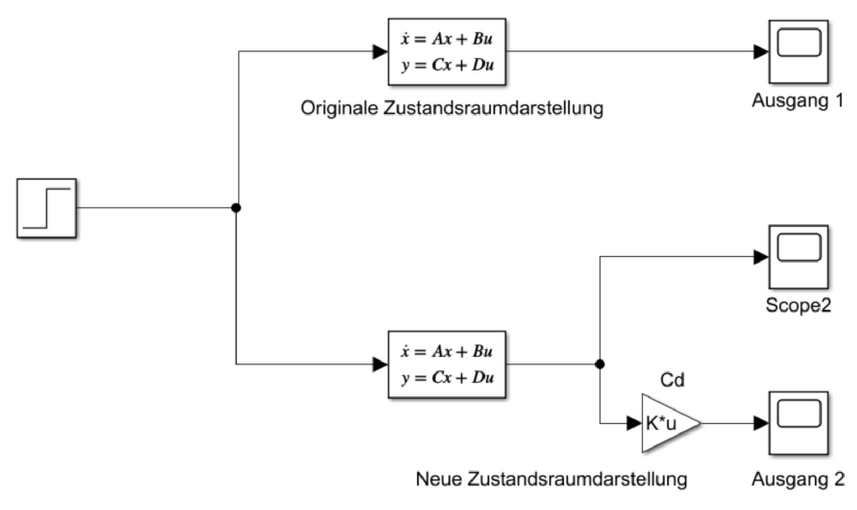

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Zunächst untersuchen wir das Ausgangsignal von der „originalen“
Zustandsraumdarstellung :

In [12]:
% Set the Octave Engine to run the simulation
% Simulation Parameters
pkg load control
addpath("./Octsim");
% Start time
tini = 0;
% End time
tfinal = 7;
% Time Step
dt =0.01;
% Number of data flows in the schematic
nflows = 4;

xo = 0;

% Instance of the simulation schematic
sc = Schema(tini,tfinal,dt,nflows);

% List of components
c{1} = StepSource(1,0,1,1);
c{2} = StateSpace(1,2,A,B,C,D,xo);
c{3} = StateSpace(1,3,Adc,Bd,[0 1],0,xo);
c{4} = StateSpace(1,4,Adc,Bd,[1 0],0,xo);
c{5} = StateSpace(1,5,Adc,Bd,Cd,0,xo);


sc.AddListComponents(c);

% Run the schematic and plot
out = sc.Run([2 3 4 5]);

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Unter „Ausgang 1“ stellen wir das Ausgangsignal von der „originalen“
Zustandsraumdarstellung dar:

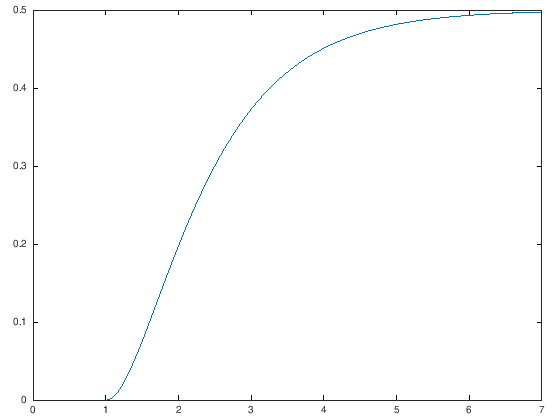

In [13]:
%Ausgang 1
plot(out(1,:),out(2,:));  

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Unter „Ausgang 2“ können wir das Ausgangsignal von der „modifizierten“
Zustandsraumdarstellung in Normalform untersuchen:

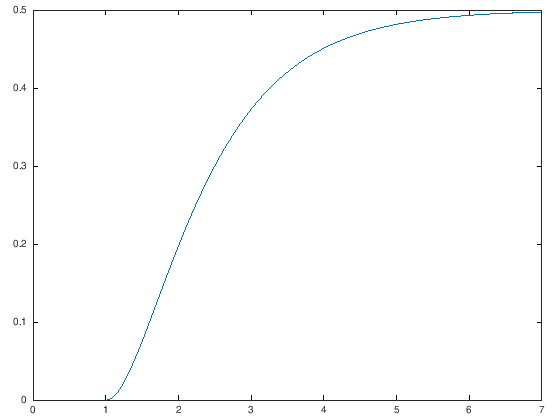

In [15]:
% Ausgang 2
plot(out(1,:),out(5,:));

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
 Scope 2:

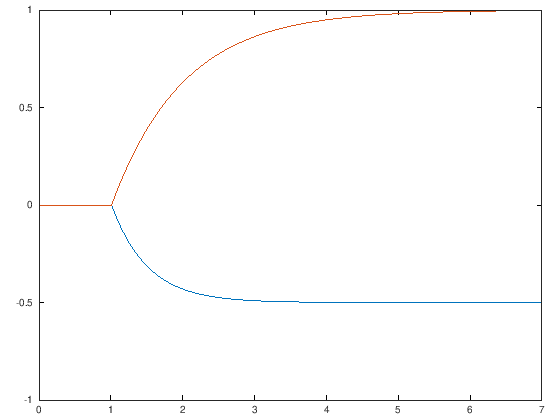

In [11]:
%Scope 2:
plot(out(1,:),out(3,:),out(1,:),out(4,:)); 